## Importing Libraries

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras import models, datasets, layers, Sequential
from tensorflow.keras.layers import Conv2D, Input, Dropout, Activation, Dense, MaxPooling2D, Flatten, AveragePooling2D, LayerNormalization

## Data Analysis

In [2]:
intrusion=pd.read_csv('IoT Network Intrusion Dataset reduced.csv')
intrusion.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-222.37.40.84-554-3808-6,222.37.40.84,3808,192.168.0.13,554,6,26/05/2019 10:06:48 PM,3712,0,2,...,0.0,0,0,3712.0,0.0,3712,3712,Anomaly,DoS,DoS-Synflooding
1,192.168.0.13-111.55.237.140-554-7651-6,111.55.237.140,7651,192.168.0.13,554,6,26/05/2019 10:20:38 PM,2857,1,2,...,0.0,278,278,2579.0,0.0,2579,2579,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-222.46.47.123-554-8058-6,222.46.47.123,8058,192.168.0.13,554,6,26/05/2019 10:06:38 PM,4456,0,2,...,0.0,0,0,4456.0,0.0,4456,4456,Anomaly,DoS,DoS-Synflooding
3,192.168.0.13-111.24.136.220-554-5457-6,111.24.136.220,5457,192.168.0.13,554,6,26/05/2019 10:20:37 PM,4636,0,2,...,0.0,0,0,4636.0,0.0,4636,4636,Anomaly,DoS,DoS-Synflooding
4,192.168.0.24-111.189.152.242-19604-2031-6,111.189.152.242,2031,192.168.0.24,19604,6,4/6/2019 23:44,4524,0,2,...,0.0,0,0,4524.0,0.0,4524,4524,Anomaly,DoS,DoS-Synflooding


In [3]:
intrusion.describe()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
count,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.00000,30006.000000,30006.000000,...,30006.000000,30006.0,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000
mean,26465.392988,21542.648937,6.913384,1117.011331,0.983537,1.675765,559.231987,1009.71749,352.664534,248.280444,...,0.756315,0.0,6.595514,0.596822,7.389789,6.099213,873.513550,109.351452,997.753416,801.461774
std,23019.685454,21378.308713,3.471568,5082.339575,2.335441,0.893803,1388.640081,1214.74734,596.795944,517.332901,...,2.327195,0.0,83.158282,20.450996,98.627379,78.831176,3133.698473,1795.465449,4320.496625,2868.283569
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9020.000000,554.000000,6.000000,118.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,77.000000,0.000000,79.000000,74.000000
50%,9020.000000,9020.000000,6.000000,168.000000,0.000000,2.000000,0.000000,873.00000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,121.000000,0.000000,127.000000,115.000000
75%,52717.000000,49784.000000,6.000000,452.000000,1.000000,2.000000,710.000000,1418.00000,510.000000,30.000000,...,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,275.000000,2.121320,350.000000,274.000000
max,65255.000000,64778.000000,17.000000,99960.000000,97.000000,43.000000,90334.000000,17990.00000,1460.000000,1460.000000,...,97.000000,0.0,3452.000000,1786.545176,5298.000000,3452.000000,96506.000000,66272.875960,96506.000000,96506.000000


In [4]:
intrusion.columns.tolist()

['Flow_ID',
 'Src_IP',
 'Src_Port',
 'Dst_IP',
 'Dst_Port',
 'Protocol',
 'Timestamp',
 'Flow_Duration',
 'Tot_Fwd_Pkts',
 'Tot_Bwd_Pkts',
 'TotLen_Fwd_Pkts',
 'TotLen_Bwd_Pkts',
 'Fwd_Pkt_Len_Max',
 'Fwd_Pkt_Len_Min',
 'Fwd_Pkt_Len_Mean',
 'Fwd_Pkt_Len_Std',
 'Bwd_Pkt_Len_Max',
 'Bwd_Pkt_Len_Min',
 'Bwd_Pkt_Len_Mean',
 'Bwd_Pkt_Len_Std',
 'Flow_Byts/s',
 'Flow_Pkts/s',
 'Flow_IAT_Mean',
 'Flow_IAT_Std',
 'Flow_IAT_Max',
 'Flow_IAT_Min',
 'Fwd_IAT_Tot',
 'Fwd_IAT_Mean',
 'Fwd_IAT_Std',
 'Fwd_IAT_Max',
 'Fwd_IAT_Min',
 'Bwd_IAT_Tot',
 'Bwd_IAT_Mean',
 'Bwd_IAT_Std',
 'Bwd_IAT_Max',
 'Bwd_IAT_Min',
 'Fwd_PSH_Flags',
 'Bwd_PSH_Flags',
 'Fwd_URG_Flags',
 'Bwd_URG_Flags',
 'Fwd_Header_Len',
 'Bwd_Header_Len',
 'Fwd_Pkts/s',
 'Bwd_Pkts/s',
 'Pkt_Len_Min',
 'Pkt_Len_Max',
 'Pkt_Len_Mean',
 'Pkt_Len_Std',
 'Pkt_Len_Var',
 'FIN_Flag_Cnt',
 'SYN_Flag_Cnt',
 'RST_Flag_Cnt',
 'PSH_Flag_Cnt',
 'ACK_Flag_Cnt',
 'URG_Flag_Cnt',
 'CWE_Flag_Count',
 'ECE_Flag_Cnt',
 'Down/Up_Ratio',
 'Pkt_Size_Avg',
 '

In [5]:
intrusion['Cat'].unique()

array(['DoS', 'Mirai', 'MITM ARP Spoofing', 'Normal', 'Scan'],
      dtype=object)

In [6]:
intrusion['Cat'].nunique()

5

In [7]:
intrusion_data=intrusion.drop(['Flow_ID', 'Src_IP', 'Dst_IP', 'Timestamp', 'Src_Port','Sub_Cat'], axis=1)

In [8]:
x = intrusion_data.columns.tolist()
y = intrusion_data.select_dtypes(include=np.number).columns.tolist()
list(set(x)-set(y))

['Cat', 'Label']

# creating catgeory data


In [9]:
Cat_map = {
    'Normal' : 0,
    'Mirai' : 1,
    'DoS' : 2,
    'Scan' : 3,
    'MITM ARP Spoofing' : 4,
}

In [10]:
intrusion_cat = intrusion_data.drop(['Label'], axis=1)
cat_data = intrusion_cat['Cat'].map(Cat_map)
intrusion_cat['Cat'] = cat_data
print(intrusion_cat.head())

   Dst_Port  Protocol  Flow_Duration  Tot_Fwd_Pkts  Tot_Bwd_Pkts  \
0       554         6           3712             0             2   
1       554         6           2857             1             2   
2       554         6           4456             0             2   
3       554         6           4636             0             2   
4     19604         6           4524             0             2   

   TotLen_Fwd_Pkts  TotLen_Bwd_Pkts  Fwd_Pkt_Len_Max  Fwd_Pkt_Len_Min  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   Fwd_Pkt_Len_Mean  ...  Fwd_Seg_Size_Min  Active_Mean  Active_Std  \
0               0.0  ...                 0          0.0         0.0   
1         

# Creating Label data

In [11]:
Label_map = {
    'Normal' : 0,
    'Anomaly' : 1
}

intrusion_label = intrusion_data.drop(['Cat'], axis=1)
label_data = intrusion_label['Label'].map(Label_map)
intrusion_label['Label'] = label_data
print(intrusion_label.head())

   Dst_Port  Protocol  Flow_Duration  Tot_Fwd_Pkts  Tot_Bwd_Pkts  \
0       554         6           3712             0             2   
1       554         6           2857             1             2   
2       554         6           4456             0             2   
3       554         6           4636             0             2   
4     19604         6           4524             0             2   

   TotLen_Fwd_Pkts  TotLen_Bwd_Pkts  Fwd_Pkt_Len_Max  Fwd_Pkt_Len_Min  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   Fwd_Pkt_Len_Mean  ...  Fwd_Seg_Size_Min  Active_Mean  Active_Std  \
0               0.0  ...                 0          0.0         0.0   
1         

In [12]:
intrusion_cat.fillna(0)

,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Cat
0,554,6,3712,0,2,0,0,0,0,0.0,...,0,0.0,0.0,0,0,3712.0,0.0,3712,3712,2
1,554,6,2857,1,2,0,0,0,0,0.0,...,0,278.0,0.0,278,278,2579.0,0.0,2579,2579,2
2,554,6,4456,0,2,0,0,0,0,0.0,...,0,0.0,0.0,0,0,4456.0,0.0,4456,4456,2
3,554,6,4636,0,2,0,0,0,0,0.0,...,0,0.0,0.0,0,0,4636.0,0.0,4636,4636,2
4,19604,6,4524,0,2,0,0,0,0,0.0,...,0,0.0,0.0,0,0,4524.0,0.0,4524,4524,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30001,9020,6,73,1,1,0,0,0,0,0.0,...,0,0.0,0.0,0,0,73.0,0.0,73,73,3
30002,9020,6,77,1,1,0,0,0,0,0.0,...,0,0.0,0.0,0,0,77.0,0.0,77,77,3
30003,36762,6,156,0,2,0,0,0,0,0.0,...,0,0.0,0.0,0,0,156.0,0.0,156,156,3
30004,9020,6,75,1,1,0,0,0,0,0.0,...,0,0.0,0.0,0,0,75.0,0.0,75,75,3


In [13]:
intrusion_label.fillna(0)

,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,554,6,3712,0,2,0,0,0,0,0.0,...,0,0.0,0.0,0,0,3712.0,0.0,3712,3712,1
1,554,6,2857,1,2,0,0,0,0,0.0,...,0,278.0,0.0,278,278,2579.0,0.0,2579,2579,1
2,554,6,4456,0,2,0,0,0,0,0.0,...,0,0.0,0.0,0,0,4456.0,0.0,4456,4456,1
3,554,6,4636,0,2,0,0,0,0,0.0,...,0,0.0,0.0,0,0,4636.0,0.0,4636,4636,1
4,19604,6,4524,0,2,0,0,0,0,0.0,...,0,0.0,0.0,0,0,4524.0,0.0,4524,4524,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30001,9020,6,73,1,1,0,0,0,0,0.0,...,0,0.0,0.0,0,0,73.0,0.0,73,73,1
30002,9020,6,77,1,1,0,0,0,0,0.0,...,0,0.0,0.0,0,0,77.0,0.0,77,77,1
30003,36762,6,156,0,2,0,0,0,0,0.0,...,0,0.0,0.0,0,0,156.0,0.0,156,156,1
30004,9020,6,75,1,1,0,0,0,0,0.0,...,0,0.0,0.0,0,0,75.0,0.0,75,75,1


In [14]:
X = intrusion_cat.drop(['Cat'], axis=1)
X.shape
y=intrusion_cat['Cat']
y.shape

(30006,)

In [15]:
print(X.columns.isnull().sum())

0


In [16]:
X = X.astype(float)
print(X.dtypes)

Dst_Port         float64
Protocol         float64
Flow_Duration    float64
Tot_Fwd_Pkts     float64
Tot_Bwd_Pkts     float64
                  ...   
Active_Min       float64
Idle_Mean        float64
Idle_Std         float64
Idle_Max         float64
Idle_Min         float64
Length: 78, dtype: object


In [17]:
np.where(X.values >= np.finfo(np.float64).max)

(array([5495, 5495, 9240, 9240, 9656, 9656, 9727, 9727, 9826, 9826],
       dtype=int64),
 array([15, 16, 15, 16, 15, 16, 15, 16, 15, 16], dtype=int64))

In [18]:
X[X==np.inf]=np.nan
X.fillna(0, inplace=True)

## Data Normalization

In [19]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
scaler.fit(X)
X_normalized = pd.DataFrame(scaler.transform(X), columns=X.columns)
X.update(X_normalized)

In [20]:
X.head()

,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
0,-0.982895,-0.294118,-0.925730,-1.000000,-0.952381,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.000000,-1.0,-1.000000,-1.000000,-0.923072,-1.0,-0.923072,-0.923072
1,-0.982895,-0.294118,-0.942837,-0.979381,-0.952381,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-0.838934,-1.0,-0.895055,-0.838934,-0.946553,-1.0,-0.946553,-0.946553
2,-0.982895,-0.294118,-0.910844,-1.000000,-0.952381,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.000000,-1.0,-1.000000,-1.000000,-0.907653,-1.0,-0.907653,-0.907653
3,-0.982895,-0.294118,-0.907243,-1.000000,-0.952381,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.000000,-1.0,-1.000000,-1.000000,-0.903923,-1.0,-0.903923,-0.903923
4,-0.394733,-0.294118,-0.909484,-1.000000,-0.952381,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.000000,-1.0,-1.000000,-1.000000,-0.906244,-1.0,-0.906244,-0.906244


In [21]:
np.where(X.values >= np.finfo(np.float64).max)

(array([], dtype=int64), array([], dtype=int64))

In [22]:
np.where(y.values >= np.finfo(np.float64).max)

(array([], dtype=int64),)

In [23]:
X[X==np.inf]=np.nan
X.fillna(0, inplace=True)

In [24]:
y[y==np.inf]=np.nan
y.fillna(0, inplace=True)

C:\Users\missu\AppData\Local\Temp\ipykernel_17140\2679510254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y==np.inf]=np.nan


In [25]:
y_copy = y.copy()

# Replace np.inf with np.nan in the copy of y
y_copy[y_copy == np.inf] = np.nan

# Fill NaN values with 0 in the copy of y
y_copy.fillna(0, inplace=True)

### Splitting Data


In [26]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

In [27]:
y_train.head()

4112     2
13631    4
18315    0
3717     2
6697     1
Name: Cat, dtype: int64

### Features Extraction

In [28]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold

forest = RandomForestClassifier()
_ = forest.fit(X_train, y_train)
print(forest.score(X_test, y_test))

rfe = RFE(forest, n_features_to_select=64)

# Define 5-fold cross-validation object
cv = KFold(n_splits=5, shuffle=True, random_state=1)

# Perform RFE with 5-fold cross-validation
scores = cross_val_score(rfe, X, y, cv=cv)

# Print mean score and standard deviation
print('Accuracy: {:.3f} (+/- {:.3f})'.format(scores.mean(), scores.std()))


0.8735421526157947
Accuracy: 0.877 (+/- 0.002)


In [29]:
pd.DataFrame(
    zip(X_train.columns, abs(forest.feature_importances_)),
    columns=["feature", "weight"],
).sort_values("weight").reset_index(drop=True)

,feature,weight
0,Init_Fwd_Win_Byts,0.000000
1,Fwd_Seg_Size_Min,0.000000
2,Fwd_URG_Flags,0.000000
3,Fwd_PSH_Flags,0.000000
4,Bwd_Blk_Rate_Avg,0.000000
...,...,...
73,Flow_IAT_Mean,0.047307
74,Flow_IAT_Max,0.047872
75,Flow_Duration,0.069063
76,Init_Bwd_Win_Byts,0.096977


In [30]:
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
# Init, fit
# scoring = ['accuracy', 'precision', 'recall', 'f1']
rfecv = RFECV(
    estimator=RandomForestClassifier(),
    min_features_to_select=64,
    n_jobs=-1,
    step=10,
    scoring='accuracy',
    cv=5
)

In [31]:
_ = rfecv.fit(X_train, y_train)

In [32]:
print(X_train.columns[rfecv.get_support()])

Index(['Dst_Port', 'Protocol', 'Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts',
       'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max',
       'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean',
       'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Bwd_PSH_Flags', 'Fwd_Header_Len', 'Bwd_Header_Len',
       'Fwd_Pkts/s', 'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Max',
       'Pkt_Len_Mean', 'Pkt_Len_Std', 'Pkt_Len_Var', 'FIN_Flag_Cnt',
       'SYN_Flag_Cnt', 'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt',
       'CWE_Flag_Count', 'Down/Up_Ratio', 'Pkt_Size_Avg', 'Fwd_Seg_Size_Avg',
       'Bwd_Seg_Size_Avg', 'Subflow_Fwd_Pkts', 'Subflow_Fwd_Byts',
       'Subflow_Bwd_Pk

In [33]:
#selected_features = X_train.columns[rfecv.get_support()]
#selected_features=selected_features.tolist()

In [34]:
n=64
feature_importance = _.estimator_.feature_importances_  # or coef_
feature_importance_sorted = sorted(enumerate(feature_importance), key=lambda x: x[1])
top_n_idx = [idx for idx, _ in feature_importance_sorted[:n]]

top_64_features = X_train.columns[top_n_idx]
top_64_features = top_64_features.tolist()
top_64_features

['Fwd_Pkts/b_Avg',
 'Pkt_Len_Var',
 'Fwd_Blk_Rate_Avg',
 'RST_Flag_Cnt',
 'Bwd_Byts/b_Avg',
 'Pkt_Len_Mean',
 'Fwd_IAT_Std',
 'Fwd_Pkt_Len_Std',
 'PSH_Flag_Cnt',
 'ECE_Flag_Cnt',
 'Pkt_Size_Avg',
 'Bwd_Pkt_Len_Std',
 'Tot_Fwd_Pkts',
 'Fwd_PSH_Flags',
 'Fwd_IAT_Min',
 'Fwd_IAT_Mean',
 'Bwd_IAT_Std',
 'FIN_Flag_Cnt',
 'Tot_Bwd_Pkts',
 'Pkt_Len_Min',
 'Pkt_Len_Max',
 'Fwd_IAT_Tot',
 'Fwd_IAT_Max',
 'Fwd_Byts/b_Avg',
 'Bwd_Header_Len',
 'Bwd_Pkt_Len_Mean',
 'Bwd_PSH_Flags',
 'Bwd_URG_Flags',
 'Bwd_Pkt_Len_Min',
 'Bwd_Pkts/s',
 'Down/Up_Ratio',
 'CWE_Flag_Count',
 'Fwd_Seg_Size_Avg',
 'Fwd_Pkt_Len_Max',
 'Bwd_Pkt_Len_Max',
 'Flow_Byts/s',
 'TotLen_Fwd_Pkts',
 'TotLen_Bwd_Pkts',
 'Bwd_IAT_Min',
 'URG_Flag_Cnt',
 'ACK_Flag_Cnt',
 'Fwd_Pkts/s',
 'Flow_IAT_Std',
 'Bwd_Blk_Rate_Avg',
 'Fwd_Pkt_Len_Min',
 'Fwd_Pkt_Len_Mean',
 'SYN_Flag_Cnt',
 'Flow_IAT_Min',
 'Fwd_URG_Flags',
 'Pkt_Len_Std',
 'Bwd_IAT_Max',
 'Bwd_IAT_Mean',
 'Subflow_Fwd_Byts',
 'Protocol',
 'Bwd_Pkts/b_Avg',
 'Fwd_Header_Len',
 

In [35]:
 features_removed=(set(X_train.columns)-set(top_64_features))
features_removed

{'Active_Max',
 'Active_Mean',
 'Active_Min',
 'Active_Std',
 'Fwd_Act_Data_Pkts',
 'Fwd_Seg_Size_Min',
 'Idle_Max',
 'Idle_Mean',
 'Idle_Min',
 'Idle_Std',
 'Init_Bwd_Win_Byts',
 'Init_Fwd_Win_Byts',
 'Subflow_Bwd_Byts',
 'Subflow_Bwd_Pkts'}

In [37]:
features_to_be_dropped=['Active_Max',
 'Active_Mean',
 'Active_Min',
 'Active_Std',
 'Fwd_Act_Data_Pkts',
 'Fwd_Seg_Size_Min',
 'Idle_Max',
 'Idle_Mean',
 'Idle_Min',
 'Idle_Std',
 'Init_Bwd_Win_Byts',
 'Init_Fwd_Win_Byts',
 'Subflow_Bwd_Byts',
 'Subflow_Bwd_Pkts']

In [38]:
X_train=X_train.drop(features_to_be_dropped, axis=1)
X_test=X_test.drop(features_to_be_dropped, axis=1)
X_val=X_val.drop(features_to_be_dropped, axis=1)

## Model Training

### Multiclass Classification

In [51]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LayerNormalization
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy
from keras.callbacks import EarlyStopping

from keras.models import load_model, Model


X_train = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], 1)
X_val = X_val_array.reshape(X_val_array.shape[0], X_val_array.shape[1], 1)
X_test = X_test_array.reshape(X_test_array.shape[0], X_test_array.shape[1], 1)



cnn1 = load_model('CNN1D.h5')
cnn1.layers.pop()
cnn1.layers.pop()

cnn1.add(Dense(512, activation='relu', name="dense_a"))
cnn1.add(Dense(units=5, activation='sigmoid', name="dense_b"))

for layer in cnn1.layers[:-2]:
    layer.trainable = False

cnn1.compile(optimizer=Adam(learning_rate=0.0001),
              loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

history = cnn1.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), 
            callbacks=[EarlyStopping(monitor='val_loss', patience=5)], verbose=1)



Epoch 1/25
563/563 [==============================] - 21s 28ms/step - loss: 1.2514 - accuracy: 0.5599 - val_loss: 1.0207 - val_accuracy: 0.5849
Epoch 2/25
563/563 [==============================] - 16s 28ms/step - loss: 0.9625 - accuracy: 0.6281 - val_loss: 0.8855 - val_accuracy: 0.6769
Epoch 3/25
563/563 [==============================] - 16s 28ms/step - loss: 0.8816 - accuracy: 0.6598 - val_loss: 0.8323 - val_accuracy: 0.6856
Epoch 4/25
563/563 [==============================] - 16s 28ms/step - loss: 0.8448 - accuracy: 0.6742 - val_loss: 0.8014 - val_accuracy: 0.7040
Epoch 5/25
563/563 [==============================] - 16s 29ms/step - loss: 0.8231 - accuracy: 0.6792 - val_loss: 0.7813 - val_accuracy: 0.6929
Epoch 6/25
563/563 [==============================] - 16s 28ms/step - loss: 0.8069 - accuracy: 0.6882 - val_loss: 0.7646 - val_accuracy: 0.7029
Epoch 7/25
563/563 [==============================] - 16s 29ms/step - loss: 0.7918 - accuracy: 0.6972 - val_loss: 0.7521 - val_accuracy:

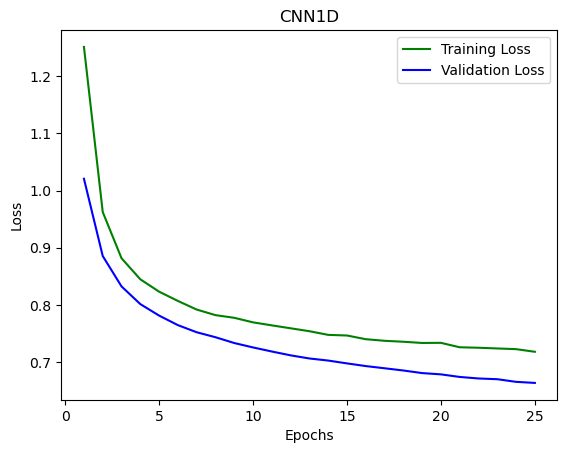

In [53]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, 26)
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('CNN1D')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

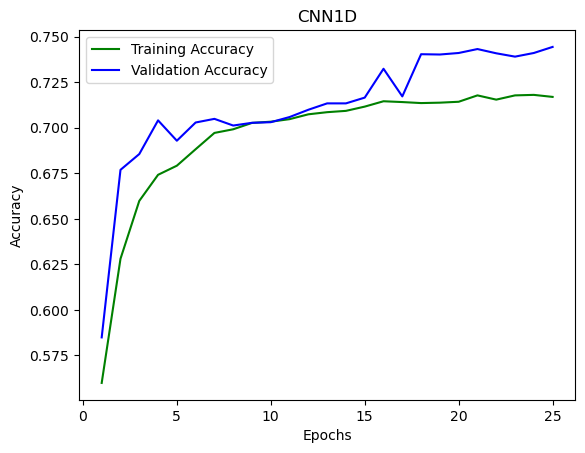

In [54]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, 26)
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('CNN1D')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [55]:
y_pred = cnn1.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)

188/188 [==============================] - 3s 12ms/step


In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nTesting Accuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred_classes)*100))

print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_classes, average='weighted')*100))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_classes, average='weighted')*100))
print('F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_classes, average='weighted')*100))


Testing Accuracy: 75.86

Precision: 77.13
Recall: 75.86
F1-score: 75.51



In [57]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_classes)
print(cm)

[[1824    4    6   63  104]
 [ 198  560    1   99  142]
 [   7    4  987    0    2]
 [ 214   16    1  496  273]
 [  36   21    1  257  686]]


In [58]:
np.unique(y_test)

array([0, 1, 2, 3, 4], dtype=int64)

In [59]:
np.unique(y_pred_classes)

array([0, 1, 2, 3, 4], dtype=int64)

In [60]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_classes, target_names=['Normal','Mirai','DoS','Scan','MITM ARP Spoofing'])

print(report)

                   precision    recall  f1-score   support

           Normal       0.80      0.91      0.85      2001
            Mirai       0.93      0.56      0.70      1000
              DoS       0.99      0.99      0.99      1000
             Scan       0.54      0.50      0.52      1000
MITM ARP Spoofing       0.57      0.69      0.62      1001

         accuracy                           0.76      6002
        macro avg       0.77      0.73      0.74      6002
     weighted avg       0.77      0.76      0.76      6002



In [61]:
num_classes = len(np.unique(y_test))
accuracy = np.zeros(num_classes)
tp = np.zeros(num_classes)
tn = np.zeros(num_classes)
fp = np.zeros(num_classes)
fn = np.zeros(num_classes)

for i in range(num_classes):
    tp[i] = cm[i, i]
    tn[i] = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    fp[i] = np.sum(cm[:, i]) - cm[i, i]
    fn[i] = np.sum(cm[i, :]) - cm[i, i]
    accuracy[i] = (tp[i] + tn[i]) / np.sum(cm)
    
category = ['Normal','Mirai','DoS','Scan','MITM ARP Spoofing']

model_test_scores = pd.DataFrame(list(zip(category,accuracy,tp,tn,fp,fn)), columns = ['Category', \
                                'Accuracy', 'TPR','TNR', 'FPR', 'FNR'])
display(model_test_scores)

,Category,Accuracy,TPR,TNR,FPR,FNR
0,Normal,0.894702,1824.0,3546.0,455.0,177.0
1,Mirai,0.919194,560.0,4957.0,45.0,440.0
2,DoS,0.996335,987.0,4993.0,9.0,13.0
3,Scan,0.846218,496.0,4583.0,419.0,504.0
4,MITM ARP Spoofing,0.860713,686.0,4480.0,521.0,315.0


In [63]:
cnn1.save('intrusion_cnn1d.h5')

C:\Users\missu\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
